# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1:"Married", 2:"Widowed", 3:"Divorced", 4:"Separated", 5:"Never married", 6:"Living with partner", 77:"Refused", 99:"Don't Know"})
da["DMDMARTLx"] = da.DMDMARTLx.fillna("Missing")
da.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [3]:
temp = da.DMDMARTLx.value_counts()
temp / temp.sum()

Married                0.484743
Never married          0.175065
Divorced               0.100959
Living with partner    0.091892
Widowed                0.069050
Missing                0.045510
Separated              0.032432
Refused                0.000349
Name: DMDMARTLx, dtype: float64

In [4]:
# Only for women
da.DMDMARTLx.where(da["RIAGENDR"]==2).value_counts()

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

In [5]:
temp = da.DMDMARTLx.where(da["RIAGENDR"]==2).value_counts()
temp / temp.sum()

Married                0.437836
Never married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with partner    0.088038
Missing                0.042339
Separated              0.039651
Refused                0.000336
Name: DMDMARTLx, dtype: float64

In [6]:
# Only for men
da.DMDMARTLx.where(da["RIAGENDR"]==1).value_counts()

Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

In [7]:
temp = da.DMDMARTLx.where(da["RIAGENDR"]==1).value_counts()
temp / temp.sum()

Married                0.535339
Never married          0.175426
Living with partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Separated              0.024647
Refused                0.000362
Name: DMDMARTLx, dtype: float64

Constructing previous six frequency tables using only people whose age is between 30 and 40.

In [8]:
# Men and women
da.DMDMARTLx.where((da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40)).value_counts()

Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTLx, dtype: int64

In [9]:
temp = da.DMDMARTLx.where((da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40)).value_counts()
temp / temp.sum()

Married                0.545809
Never married          0.211501
Living with partner    0.139376
Divorced               0.068226
Separated              0.029240
Widowed                0.004873
Refused                0.000975
Name: DMDMARTLx, dtype: float64

In [10]:
# Only for women
da.DMDMARTLx.where((da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40) & (da["RIAGENDR"]==2)).value_counts()

Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: DMDMARTLx, dtype: int64

In [11]:
temp = da.DMDMARTLx.where((da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40) & (da["RIAGENDR"]==2)).value_counts()
temp / temp.sum()

Married                0.535714
Never married          0.218045
Living with partner    0.122180
Divorced               0.086466
Separated              0.033835
Widowed                0.003759
Name: DMDMARTLx, dtype: float64

In [12]:
# Only for men
da.DMDMARTLx.where((da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40) & (da["RIAGENDR"]==1)).value_counts()

Married                275
Never married          101
Living with partner     78
Divorced                24
Separated               12
Widowed                  3
Refused                  1
Name: DMDMARTLx, dtype: int64

In [13]:
temp = da.DMDMARTLx.where((da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40) & (da["RIAGENDR"]==1)).value_counts()
temp / temp.sum()

Married                0.556680
Never married          0.204453
Living with partner    0.157895
Divorced               0.048583
Separated              0.024291
Widowed                0.006073
Refused                0.002024
Name: DMDMARTLx, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [14]:
marital=da["DMDMARTLx"].unique()
marital

array(['Married', 'Divorced', 'Living with partner', 'Separated',
       'Never married', 'Missing', 'Widowed', 'Refused'], dtype=object)

In [15]:
ages_cut=[18, 30, 40, 50, 60, 70, 80]
da["agegrp"] = pd.cut(da.RIDAGEYR, ages_cut)
temp = da.where(da["RIAGENDR"]==2).groupby("agegrp")["DMDMARTLx"].value_counts()
temp = temp.astype(float)

In [16]:
for i in range(len(ages_cut)):
    suma=temp[pd.Interval(ages_cut[i], ages_cut[i+1], closed='right')].sum()
    for item in marital:
        try:
            temp_value=temp[(pd.Interval(ages_cut[i], ages_cut[i+1], closed='right'), item)]
            temp[(pd.Interval(ages_cut[i], ages_cut[i+1], closed='right'), item)]=float(temp_value/suma)
        except:
            continue
    if ages_cut[i+1]==80:
        break
temp

agegrp    DMDMARTLx          
(18, 30]  Never married          0.425287
          Married                0.259442
          Living with partner    0.187192
          Missing                0.091954
          Divorced               0.018062
          Separated              0.018062
(30, 40]  Married                0.544304
          Never married          0.204641
          Living with partner    0.120253
          Divorced               0.090717
          Separated              0.035865
          Widowed                0.004219
(40, 50]  Married                0.573705
          Divorced               0.137450
          Never married          0.125498
          Living with partner    0.073705
          Separated              0.065737
          Widowed                0.023904
(50, 60]  Married                0.546809
          Divorced               0.176596
          Never married          0.089362
          Living with partner    0.068085
          Widowed                0.059574
    

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [17]:
da["agegrp"] = pd.cut(da.RIDAGEYR, ages_cut)
temp = da.where(da["RIAGENDR"]==1).groupby("agegrp")["DMDMARTLx"].value_counts()
temp = temp.astype(float)

In [18]:
for i in range(len(ages_cut)):
    suma=temp[pd.Interval(ages_cut[i], ages_cut[i+1], closed='right')].sum()
    for item in marital:
        try:
            temp_value=temp[(pd.Interval(ages_cut[i], ages_cut[i+1], closed='right'), item)]
            temp[(pd.Interval(ages_cut[i], ages_cut[i+1], closed='right'), item)]=float(temp_value/suma)
        except:
            continue
    if ages_cut[i+1]==80:
        break
temp

agegrp    DMDMARTLx          
(18, 30]  Never married          0.481618
          Married                0.191176
          Living with partner    0.174632
          Missing                0.132353
          Separated              0.012868
          Divorced               0.003676
          Widowed                0.003676
(30, 40]  Married                0.563319
          Never married          0.194323
          Living with partner    0.157205
          Divorced               0.052402
          Separated              0.026201
          Widowed                0.004367
          Refused                0.002183
(40, 50]  Married                0.703242
          Never married          0.097257
          Divorced               0.084788
          Living with partner    0.082294
          Separated              0.027431
          Widowed                0.004988
(50, 60]  Married                0.651982
          Divorced               0.125551
          Never married          0.103524
    

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

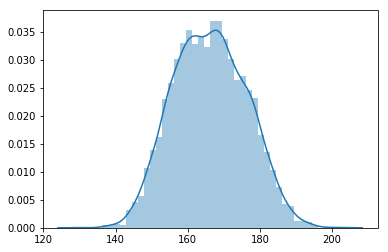

In [19]:
sns.distplot(da[["BMXHT"]].dropna())

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

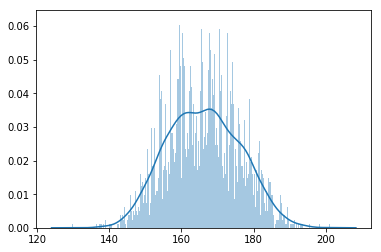

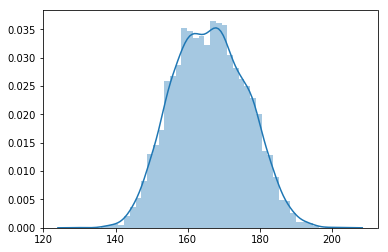

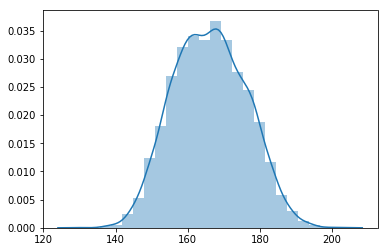

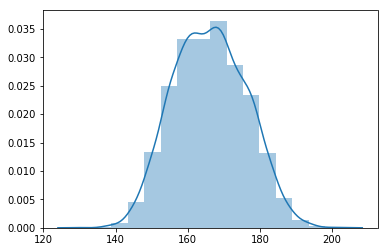

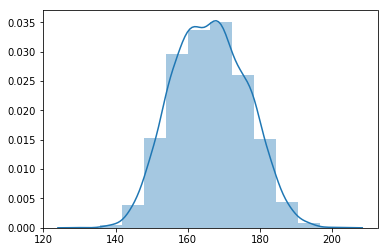

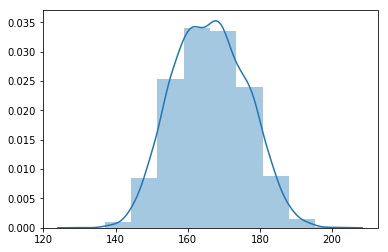

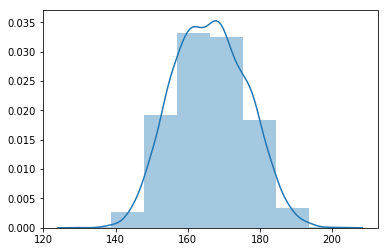

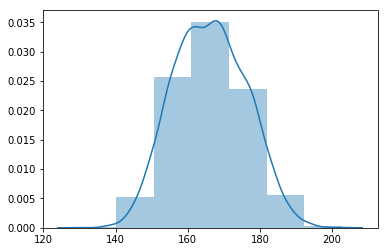

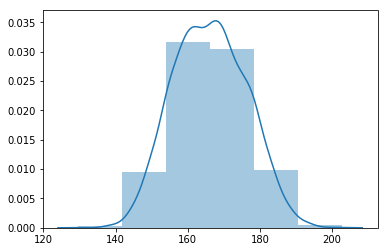

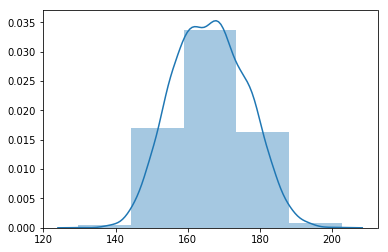

In [20]:
for i in range(100):
    if i%10==0:
        sns.distplot(da[["BMXHT"]].dropna(), bins=len(da["BMXHT"].unique())//(i+1))
        plt.show()

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

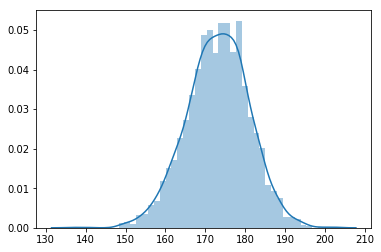

In [21]:
# Men
sns.distplot(da[["BMXHT"]].where(da["RIAGENDR"]==1).dropna())

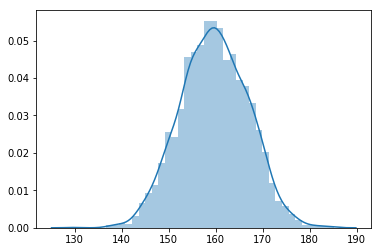

In [22]:
# Wonen
sns.distplot(da[["BMXHT"]].where(da["RIAGENDR"]==2).dropna())

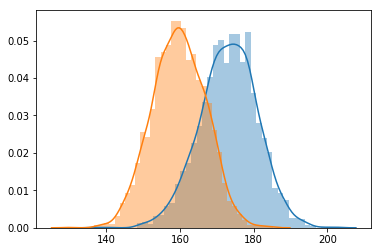

In [23]:
# Men
sns.distplot(da[["BMXHT"]].where(da["RIAGENDR"]==1).dropna())
# Wonen
sns.distplot(da[["BMXHT"]].where(da["RIAGENDR"]==2).dropna())

The height distribution for men tends to exhibit a leftward skew (negative skewness), indicating that men are generally taller than women.

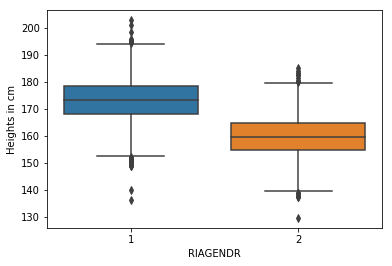

In [24]:
bp = sns.boxplot(x="RIAGENDR", y="BMXHT", data=da)
_ = bp.set_ylabel("Heights in cm")

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

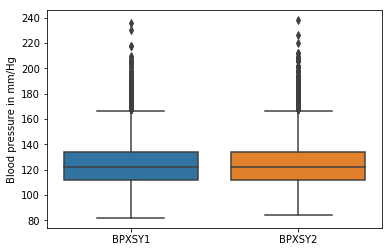

In [25]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [26]:
# THIS IS THE SAME QUESTION THAN PREVIOUS

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [27]:
da["DMDHHSIZ"].unique()

array([2, 1, 5, 3, 4, 7, 6])

In [28]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1:"Less than 9th grade", 2:"9-11th grade (Includes 12th grade with no diploma)", 3:"High school graduate/GED or equivalent", 4:"Some college or AA degree", 5:"College graduate or above", 7:"Refused", 9:"Don't Know"})
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")

In [29]:
temp = da.groupby("DMDEDUC2x")["DMDHHSIZ"].value_counts()
temp = temp.astype(float)

In [30]:
education=da.DMDEDUC2x.unique()
numbers=da.DMDHHSIZ.unique()

In [31]:
for level in education:
    suma=temp[level].sum()
    for number in numbers:
        try:
            temp[level, number]=temp[level, number]/suma
        except:
            continue
temp

DMDEDUC2x                                           DMDHHSIZ
9-11th grade (Includes 12th grade with no diploma)  2           0.222395
                                                    3           0.163297
                                                    4           0.152411
                                                    5           0.146190
                                                    1           0.116641
                                                    6           0.113530
                                                    7           0.085537
College graduate or above                           2           0.347731
                                                    3           0.193997
                                                    4           0.165447
                                                    1           0.142753
                                                    5           0.095168
                                                    6          

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [32]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Men", 2:"Women"})

In [33]:
da.where((da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40)).groupby(["RIAGENDRx","DMDEDUC2x"])["DMDHHSIZ"].median()

RIAGENDRx  DMDEDUC2x                                         
Men        9-11th grade (Includes 12th grade with no diploma)    4.5
           College graduate or above                             3.0
           High school graduate/GED or equivalent                4.0
           Less than 9th grade                                   5.0
           Some college or AA degree                             4.0
Women      9-11th grade (Includes 12th grade with no diploma)    5.0
           College graduate or above                             3.0
           High school graduate/GED or equivalent                5.0
           Less than 9th grade                                   5.0
           Some college or AA degree                             4.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [34]:
da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["RIDAGEYR"].mean()

SDMVSTRA  SDMVPSU  RIAGENDRx
119       1        Men          47.861111
                   Women        47.663265
          2        Men          54.363636
                   Women        52.987952
120       1        Men          43.130000
                   Women        43.636364
          2        Men          45.219178
                   Women        43.736111
121       1        Men          46.750000
                   Women        44.397959
          2        Men          42.063158
                   Women        44.376344
122       1        Men          44.653061
                   Women        42.897436
          2        Men          44.320000
                   Women        47.333333
123       1        Men          47.829787
                   Women        44.841121
          2        Men          52.126582
                   Women        46.457447
124       1        Men          50.750000
                   Women        51.664000
          2        Men          48.245614
     

In [35]:
da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXHT"].mean()

SDMVSTRA  SDMVPSU  RIAGENDRx
119       1        Men          172.741667
                   Women        159.570408
          2        Men          172.906818
                   Women        159.244578
120       1        Men          169.537755
                   Women        155.402041
          2        Men          173.075342
                   Women        159.218056
121       1        Men          172.177885
                   Women        158.871579
          2        Men          174.764516
                   Women        160.229032
122       1        Men          173.998969
                   Women        161.315385
          2        Men          170.332323
                   Women        157.231111
123       1        Men          174.315217
                   Women        162.059615
          2        Men          174.454430
                   Women        160.476596
124       1        Men          172.109009
                   Women        158.788710
          2        Men   

In [36]:
da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXBMI"].mean()

SDMVSTRA  SDMVPSU  RIAGENDRx
119       1        Men          26.958333
                   Women        30.052041
          2        Men          27.160465
                   Women        27.849398
120       1        Men          30.939175
                   Women        32.419388
          2        Men          27.727397
                   Women        27.400000
121       1        Men          29.416505
                   Women        30.856842
          2        Men          26.273118
                   Women        26.470968
122       1        Men          28.528866
                   Women        29.447436
          2        Men          25.744444
                   Women        26.611111
123       1        Men          29.231522
                   Women        29.905769
          2        Men          28.811392
                   Women        30.641489
124       1        Men          28.614414
                   Women        29.533065
          2        Men          27.714035
     

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [37]:
temp=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["RIDAGEYR"].mean() # In order to find out the MVUs only
q1=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["RIDAGEYR"].quantile([0.25])
q3=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["RIDAGEYR"].quantile([0.75])
iqr=q3.values-q1.values
min_iqr=min(iqr)
max_iqr=max(iqr)
index=np.where(iqr==min_iqr)[0][0]
print("AGES")
print("The MVU with MINIMUM IQR is:",temp.index[index])
print("IQR:",min_iqr)
index=np.where(iqr==max_iqr)[0][0]
print("The MVU with MAXIMUM IQR is:",temp.index[index])
print("IQR:",max_iqr)

AGES
The MVU with MINIMUM IQR is: (129, 1, 'Men')
IQR: 20.75
The MVU with MAXIMUM IQR is: (132, 2, 'Men')
IQR: 38.0


In [38]:
temp=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXHT"].mean() # In order to find out the MVUs only
q1=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXHT"].quantile([0.25])
q3=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXHT"].quantile([0.75])
iqr=q3.values-q1.values
min_iqr=min(iqr)
max_iqr=max(iqr)
index=np.where(iqr==min_iqr)[0][0]
print("HEIGTHS")
print("The MVU with MINIMUM IQR is:",temp.index[index])
print("IQR:",min_iqr)
index=np.where(iqr==max_iqr)[0][0]
print("The MVU with MAXIMUM IQR is:",temp.index[index])
print("IQR:",max_iqr)

HEIGTHS
The MVU with MINIMUM IQR is: (122, 2, 'Women')
IQR: 7.574999999999989
The MVU with MAXIMUM IQR is: (129, 1, 'Men')
IQR: 12.300000000000011


In [39]:
temp=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXBMI"].mean() # In order to find out the MVUs only
q1=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXBMI"].quantile([0.25])
q3=da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDRx"])["BMXBMI"].quantile([0.75])
iqr=q3.values-q1.values
min_iqr=min(iqr)
max_iqr=max(iqr)
index=np.where(iqr==min_iqr)[0][0]
print("BMIs")
print("The MVU with MINIMUM IQR is:",temp.index[index])
print("IQR:",min_iqr)
index=np.where(iqr==max_iqr)[0][0]
print("The MVU with MAXIMUM IQR is:",temp.index[index])
print("IQR:",max_iqr)

BMIs
The MVU with MINIMUM IQR is: (122, 2, 'Men')
IQR: 4.100000000000001
The MVU with MAXIMUM IQR is: (127, 1, 'Women')
IQR: 11.75


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.